<a href="https://colab.research.google.com/github/HarikaTumula/ICP_Basics-in-Keras/blob/main/ICP_Basics_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import numpy as np
import pandas as pd
dataset = pd.read_csv("diabetes.csv", header=None).values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
test_size=0.25, random_state=87)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam')
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100, verbose=0,
initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test, verbose=0))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________
None
0.6040123105049133


In [ ]:
pip install python-mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


11490434/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, 'Ground Truth : 5')

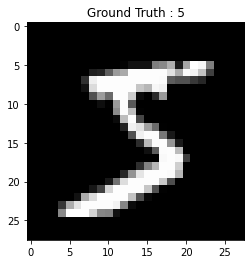

In [ ]:
from mnist import MNIST
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

In [ ]:
from keras.utils import to_categorical
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')
#scale data
train_data //=255
test_data //=255
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 8s 28ms/step - loss: 1.8392 - accuracy: 0.3639 - val_loss: 1.6759 - val_accuracy: 0.4067
Epoch 2/20
235/235 [==============================] - 8s 33ms/step - loss: 1.6250 - accuracy: 0.4151 - val_loss: 1.6258 - val_accuracy: 0.4153
Epoch 3/20
235/235 [==============================] - 7s 28ms/step - loss: 1.5802 - accuracy: 0.4280 - val_loss: 1.6300 - val_accuracy: 0.4078
Epoch 4/20
235/235 [==============================] - 8s 32ms/step - loss: 1.5523 - accuracy: 0.4385 - val_loss: 1.6149 - val_accuracy: 0.4226
Epoch 5/20
235/235 [==============================] - 7s 28ms/step - loss: 1.5324 - accuracy: 0.4433 - val_loss: 1.6137 - val_accuracy: 0.4172
Epoch 6/20
235/235 [==============================] - 8s 33ms/step - loss: 1.5146 - accuracy: 0.4482 - val_loss: 1.6016 - val_accuracy: 0.4256
Epoch 7/20
235/235 [==============================] - 7s 28ms/step - loss: 1.4996 - accuracy: 0.4536 - val_loss: 1.6109 - val_accuracy: 0.4199

In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 8ms/step - loss: 1.6975 - accuracy: 0.4185
Evaluation result on Test Data : Loss = 1.6974855661392212, accuracy = 0.41850000619888306


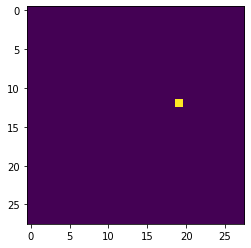

In [ ]:
plt.imshow(test_data[0].reshape(28,28))

Adding a dense layer 

In [ ]:
my_first_nn.add(Dense(7))

In [ ]:
print(my_first_nn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
 dense_5 (Dense)             (None, 7)                 14        
                                                                 
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________
None


Text(0.5, 1.0, 'Ground Truth : 5')

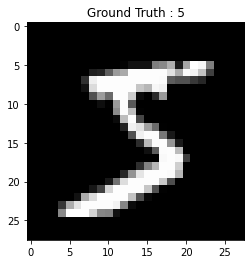

In [ ]:
from mnist import MNIST
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

In [ ]:
from keras.utils import to_categorical
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')
#scale data
train_data //=255
test_data //=255
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 11s 42ms/step - loss: 1.8389 - accuracy: 0.3628 - val_loss: 1.6832 - val_accuracy: 0.4072
Epoch 2/20
235/235 [==============================] - 8s 33ms/step - loss: 1.6261 - accuracy: 0.4174 - val_loss: 1.6349 - val_accuracy: 0.4175
Epoch 3/20
235/235 [==============================] - 6s 27ms/step - loss: 1.5808 - accuracy: 0.4293 - val_loss: 1.6263 - val_accuracy: 0.4157
Epoch 4/20
235/235 [==============================] - 8s 36ms/step - loss: 1.5541 - accuracy: 0.4374 - val_loss: 1.6183 - val_accuracy: 0.4179
Epoch 5/20
235/235 [==============================] - 6s 26ms/step - loss: 1.5331 - accuracy: 0.4434 - val_loss: 1.6254 - val_accuracy: 0.4200
Epoch 6/20
235/235 [==============================] - 7s 32ms/step - loss: 1.5146 - accuracy: 0.4499 - val_loss: 1.6085 - val_accuracy: 0.4241
Epoch 7/20
235/235 [==============================] - 6s 27ms/step - loss: 1.5003 - accuracy: 0.4533 - val_loss: 1.6240 - val_accuracy: 0.418

In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 1.7045 - accuracy: 0.4253
Evaluation result on Test Data : Loss = 1.704481601715088, accuracy = 0.4253000020980835


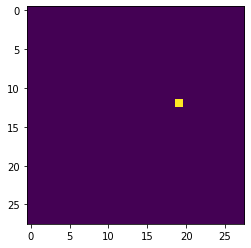

In [ ]:
plt.imshow(test_data[0].reshape(28,28))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breastcancer.csv to breastcancer (1).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("breastcancer.csv")
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('diagnosis', axis=1), dataset['diagnosis'], test_size=0.3, random_state=42)


In [ ]:
x=dataset.drop('Unnamed: 32' , axis=1)
y=dataset['Unnamed: 32']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3,random_state=0)

In [ ]:
dataset.corr().style.background_gradient(cmap="Blues")

/usr/local/lib/python3.9/dist-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.9/dist-packages/pandas/io/formats/style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,nan
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,nan
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,nan
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,nan
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,nan
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,nan
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,nan
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,nan
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,nan
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,nan


Text(0.5, 1.0, 'Ground Truth : 5')

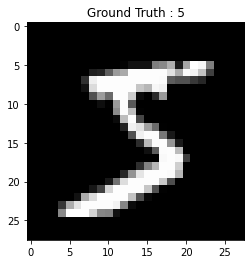

In [ ]:
from mnist import MNIST
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

In [ ]:
from keras.utils import to_categorical
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
#convert data to float and scale values between 0 and 1
train_data.astype('float')
test_data.astype('float')
#scale data
train_data //=255
test_data //=255
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
validation_data=(test_data, test_labels_one_hot))

Epoch 1/5
235/235 [==============================] - 10s 41ms/step - loss: 1.8371 - accuracy: 0.3616 - val_loss: 1.6824 - val_accuracy: 0.4011
Epoch 2/5
235/235 [==============================] - 7s 28ms/step - loss: 1.6257 - accuracy: 0.4175 - val_loss: 1.6259 - val_accuracy: 0.4195
Epoch 3/5
235/235 [==============================] - 8s 34ms/step - loss: 1.5811 - accuracy: 0.4281 - val_loss: 1.6276 - val_accuracy: 0.4221
Epoch 4/5
235/235 [==============================] - 6s 27ms/step - loss: 1.5540 - accuracy: 0.4371 - val_loss: 1.6107 - val_accuracy: 0.4240
Epoch 5/5
235/235 [==============================] - 8s 32ms/step - loss: 1.5340 - accuracy: 0.4442 - val_loss: 1.6119 - val_accuracy: 0.4240


In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 7ms/step - loss: 1.6119 - accuracy: 0.4240
Evaluation result on Test Data : Loss = 1.6118528842926025, accuracy = 0.42399999499320984


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataframe = pd.read_csv('breastcancer.csv')
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
dataframe.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df = dataframe.drop(['diagnosis'], axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.isnull().any()

id                         False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [ ]:
df.fillna(dataframe.mean(), inplace=True)
df.isnull().any()

id                         False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [ ]:
df.corr().style.background_gradient(cmap="Greens")

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,nan
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,nan
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,nan
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,nan
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,nan
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,nan
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,nan
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,nan
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,nan
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,nan


In [ ]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]


scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled_df = pd.DataFrame(X_scaled_array, columns = x.columns)

In [ ]:
#Normalization is the process of scaling individual samples to have unit norm. 
#This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.
X_normalized = preprocessing.normalize(X_scaled_df)
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


Image classification

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])

(28, 28)


In [ ]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)


784


In [ ]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [ ]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 8s 32ms/step - loss: 0.2892 - accuracy: 0.9122 - val_loss: 0.1597 - val_accuracy: 0.9514
Epoch 2/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0986 - accuracy: 0.9698 - val_loss: 0.0991 - val_accuracy: 0.9701
Epoch 3/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0625 - accuracy: 0.9800 - val_loss: 0.1205 - val_accuracy: 0.9612
Epoch 4/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0730 - val_accuracy: 0.9765
Epoch 5/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0639 - val_accuracy: 0.9804
Epoch 6/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0635 - val_accuracy: 0.9804
Epoch 7/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0689 - val_accuracy: 0.9815

In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 7ms/step - loss: 0.0736 - accuracy: 0.9833
Evaluation result on Test Data : Loss = 0.07364050298929214, accuracy = 0.983299970626831


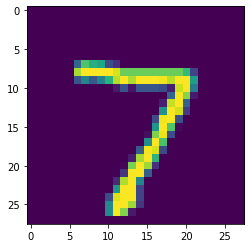

In [ ]:
plt.imshow(test_data[0].reshape(28,28))

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])


(28, 28)


In [ ]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

784


In [ ]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
235/235 [==============================] - 10s 41ms/step - loss: 0.7097 - accuracy: 0.7696 - val_loss: 0.2891 - val_accuracy: 0.9134
Epoch 2/10
235/235 [==============================] - 6s 23ms/step - loss: 0.2676 - accuracy: 0.9162 - val_loss: 0.2168 - val_accuracy: 0.9300
Epoch 3/10
235/235 [==============================] - 7s 30ms/step - loss: 0.1878 - accuracy: 0.9423 - val_loss: 0.1954 - val_accuracy: 0.9368
Epoch 4/10
235/235 [==============================] - 6s 25ms/step - loss: 0.1439 - accuracy: 0.9554 - val_loss: 0.1766 - val_accuracy: 0.9481
Epoch 5/10
235/235 [==============================] - 7s 29ms/step - loss: 0.1180 - accuracy: 0.9630 - val_loss: 0.1446 - val_accuracy: 0.9526
Epoch 6/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0981 - accuracy: 0.9690 - val_loss: 0.1308 - val_accuracy: 0.9579
Epoch 7/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0833 - accuracy: 0.9738 - val_loss: 0.1025 - val_accuracy: 0.967

changed the number of hidden layer and the
activation to tanh and sigmoid

In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.1084 - accuracy: 0.9665
Evaluation result on Test Data : Loss = 0.1083829328417778, accuracy = 0.9664999842643738


Evaluation result on Test Data got changed : 
Loss = 0.07364050298929214, accuracy = 0.983299970626831 
changed to 
Loss = 0.1083829328417778, accuracy = 0.9664999842643738

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 9s 32ms/step - loss: 4.7658 - accuracy: 0.8783 - val_loss: 0.8322 - val_accuracy: 0.9098
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.4070 - accuracy: 0.9464 - val_loss: 0.4601 - val_accuracy: 0.9355
Epoch 3/10
235/235 [==============================] - 8s 33ms/step - loss: 0.2530 - accuracy: 0.9594 - val_loss: 0.2873 - val_accuracy: 0.9535
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.2066 - accuracy: 0.9664 - val_loss: 0.3504 - val_accuracy: 0.9518
Epoch 5/10
235/235 [==============================] - 8s 33ms/step - loss: 0.1925 - accuracy: 0.9714 - val_loss: 0.3519 - val_accuracy: 0.9596
Epoch 6/10
235/235 [==============================] - 6s 26ms/step - loss: 0.1663 - accuracy: 0.9755 - val_loss: 0.3037 - val_accuracy: 0.9694
Epoch 7/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1416 - accuracy: 0.9786 - val_loss: 0.3689 - val_acc

without performing scaling

In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.3863 - accuracy: 0.9685
Evaluation result on Test Data : Loss = 0.3862886130809784, accuracy = 0.968500018119812
